In [119]:
# Data preparation
import pandas as pd
import os

plot_info = []
data_dir = "../utils"

for root, sub_dir, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".csv"):
            try:
                src_file = os.path.join(data_dir, file)
                dim = int(file[3])
                obj = int(file[9])
                tree = file[16:].strip(".csv")
                df = pd.read_csv(src_file, index_col=0).fillna(0)
                df["dimension"] = dim
                df["n_objectives"] = obj
                df["tree"] = tree
                plot_info.append(df)
            except Exception as e:
                pass
new_df = pd.concat(plot_info)
solvers = ["MOEAD", "NSGAII", "GDE3", "IBEA"]
dimensions = [2, 3, 4, 5]
n_objectives = [2, 3, 4, 5]
tree = "depth"
df_info = []
for dimension in dimensions:
    for n_objective in n_objectives:
        for solver in solvers:
            filtered_df = new_df[
                (new_df["solver"] == solver)
                & (new_df["dimension"] == dimension)
                & (new_df["tree"] == tree)
                & (new_df["n_objectives"] == n_objective)
            ]
            if not filtered_df.empty:
                df_info.append(
                    {
                        "solver": solver,
                        "dimX": dimension,
                        "dimZ": n_objective,
                        "root_mean": filtered_df["root"].mean(),
                        "root_std": filtered_df["root"].std(),
                        "node_1_mean": filtered_df["node_1"].mean(),
                        "node_1_std": filtered_df["node_1"].std(),
                        "node_2_mean": filtered_df["node_2"].mean(),
                        "node_2_std": filtered_df["node_2"].std(),
                        "node_3_mean": filtered_df["node_3"].mean(),
                        "node_3_std": filtered_df["node_3"].std(),
                        "node_4_mean": filtered_df["node_4"].mean(),
                        "node_4_std": filtered_df["node_4"].std(),
                    }
                )

stats_df = pd.DataFrame(df_info)

In [129]:
MOEA = "NSGAII"
filter_df = stats_df[stats_df["solver"] == MOEA]
filter_df["agg_dimX"] = filter_df["dimX"] + filter_df["dimZ"] - 1
filter_df.sort_values(by=["dimZ", "agg_dimX"], ascending=True, inplace=True)
value_list = []
for _, row in filter_df.iterrows():
    values = [
        row["root_mean"],
        row["node_1_mean"],
        row["node_2_mean"],
        row["node_3_mean"],
        row["node_4_mean"],
        row["root_mean"],
    ]
    value_list.append(
        {
            "values": values,
            "label": f"$\operatorname{{dim}}X={row['dimX'] + row['dimZ'] - 1}$, $\operatorname{{dim}}Z={row['dimZ']}$",
        }
    )

/var/folders/14/gcqvf_d97d300qszt3fpk6ch0000gn/T/ipykernel_2425/164314379.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/14/gcqvf_d97d300qszt3fpk6ch0000gn/T/ipykernel_2425/164314379.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



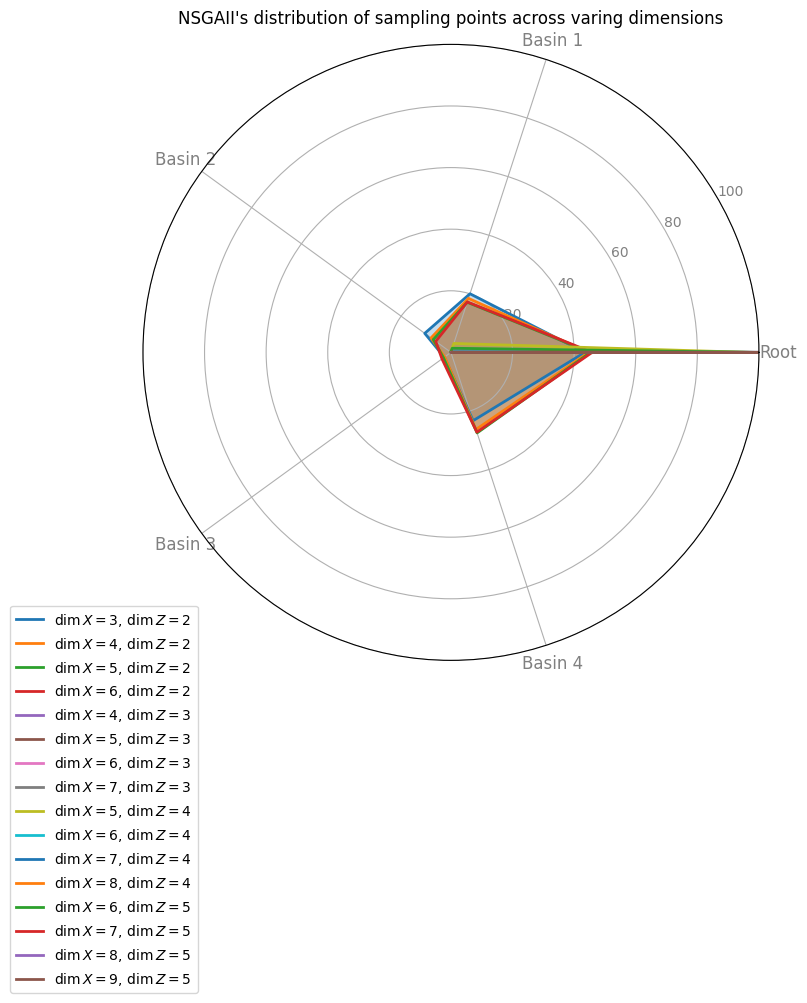

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# Categories
categories = ["Root", "Basin 1", "Basin 2", "Basin 3", "Basin 4"]
N = len(categories)

# Calculate angle for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw category labels
plt.xticks(angles[:-1], categories, color="grey", size=12)
plt.title(f"{MOEA}'s distribution of sampling points across varing dimensions")

# Set y-axis labels and range
ax.set_rlabel_position(30)
plt.yticks(
    [20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=10
)
plt.ylim(0, 100)

for value_info in value_list:
    ax.plot(
        angles,
        value_info["values"],
        linewidth=2,
        linestyle="solid",
        label=value_info["label"],
    )
    ax.fill(angles, value_info["values"], alpha=0.25)

# Add legend
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))

# Show the chart
plt.show()

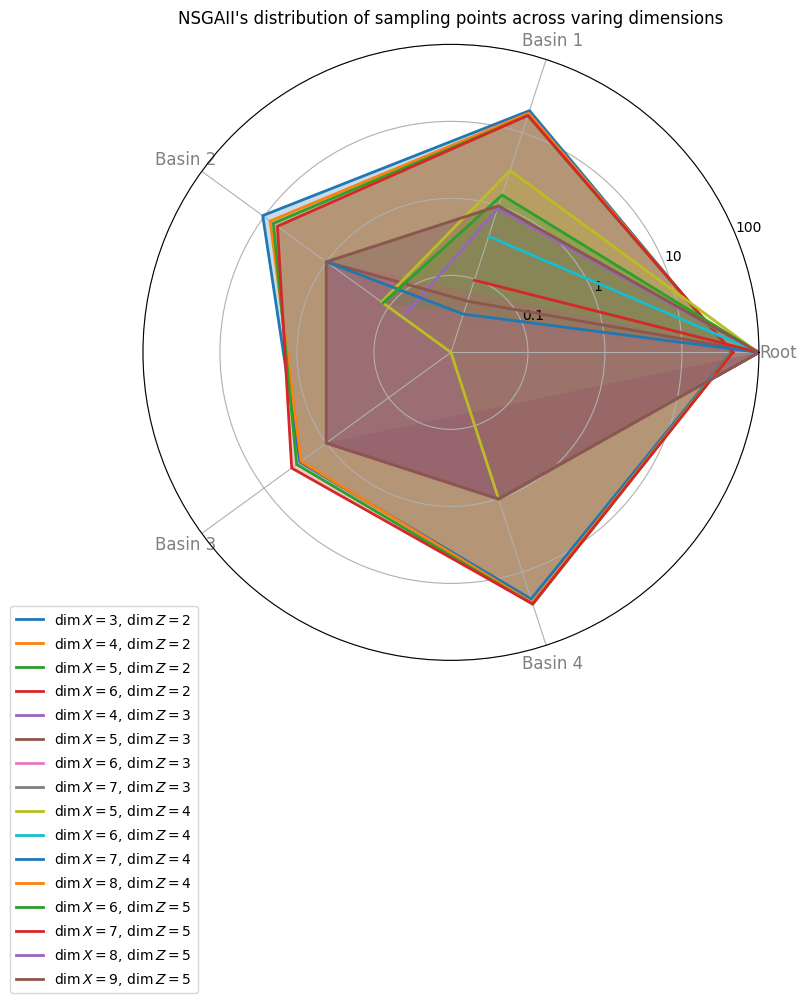

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Categories
categories = ["Root", "Basin 1", "Basin 2", "Basin 3", "Basin 4"]
N = len(categories)

# Calculate angle for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set logarithmic scale on radial axis
# ax.set_rscale('log')  # Set radial axis to logarithmic scale

# Draw category labels
plt.xticks(angles[:-1], categories, color="grey", size=12)
plt.title(f"{MOEA}'s distribution of sampling points across varing dimensions")
ax.set_ylim(-2, 2)  # For log10 scale from 0.1 (-1) to 100 (2)

# Set y-axis labels and range
# ax.set_rlabel_position(30)
log_ticks = [np.log10(0.1), np.log10(1), np.log10(10), np.log10(100)]
log_labels = ["0.1", "1", "10", "100"]
ax.set_yticks(log_ticks)
ax.set_yticklabels(log_labels)

index = 0
bypass = False
for value_info in value_list:
    index += 1
    if not bypass:
        values_log = [np.log10(v) if v else 1e-16 for v in value_info["values"]]
        ax.plot(
            angles,
            values_log,
            linewidth=2,
            linestyle="solid",
            label=value_info["label"],
        )
        ax.fill(angles, values_log, alpha=0.25)
    else:
        if index == 11:
            values_log = [np.log10(v) if v else 1e-16 for v in value_info["values"]]
            print(values_log)
            ax.plot(
                angles,
                values_log,
                linewidth=2,
                linestyle="solid",
                label=value_info["label"],
            )
            ax.fill(angles, values_log, alpha=0.25)

# Add legend
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))

# Show the chart
plt.show()

In [118]:
import plotly.graph_objects as go

# Categories
categories = ["Root", "Basin 1", "Basin 2", "Basin 3", "Basin 4"]

# Values for each dataset
values1 = [80, 90, 85, 95, 75]
values2 = [70, 85, 75, 80, 65]
values3 = [60, 75, 80, 70, 55]

# Initialize the figure
fig = go.Figure()

# Add traces for each dataset
fig.add_trace(
    go.Scatterpolar(r=values1, theta=categories, fill="toself", name="COMB A")
)
fig.add_trace(
    go.Scatterpolar(r=values2, theta=categories, fill="toself", name="COMB B")
)
fig.add_trace(
    go.Scatterpolar(r=values3, theta=categories, fill="toself", name="COMB C")
)

# Update the layout
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 100])), showlegend=True
)

# Display the chart
fig.show()